In [2]:
!pipreqsnb . 

Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in .\requirements.txt


pipreqs  .


In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Flatten, Concatenate, Dense, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 224
CHANNELS = 3
EPOCHS = 30
n_classes = 6

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "D:/ELC 2023/main_data/train/",
    shuffle=True, 
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=64
)

Found 644 files belonging to 6 classes.


['abhishek', 'harshvir', 'moksh', 'simar', 'tanmay', 'tripti']
(64, 224, 224, 3)
[3 5 4 0 2 4 2 3 2 0 0 3 1 3 5 2 3 3 5 0 2 2 1 5 0 5 2 5 5 2 2 2 3 3 5 3 5
 3 2 2 1 5 4 1 3 1 3 4 0 4 5 0 3 0 1 5 5 0 1 5 1 1 5 1]


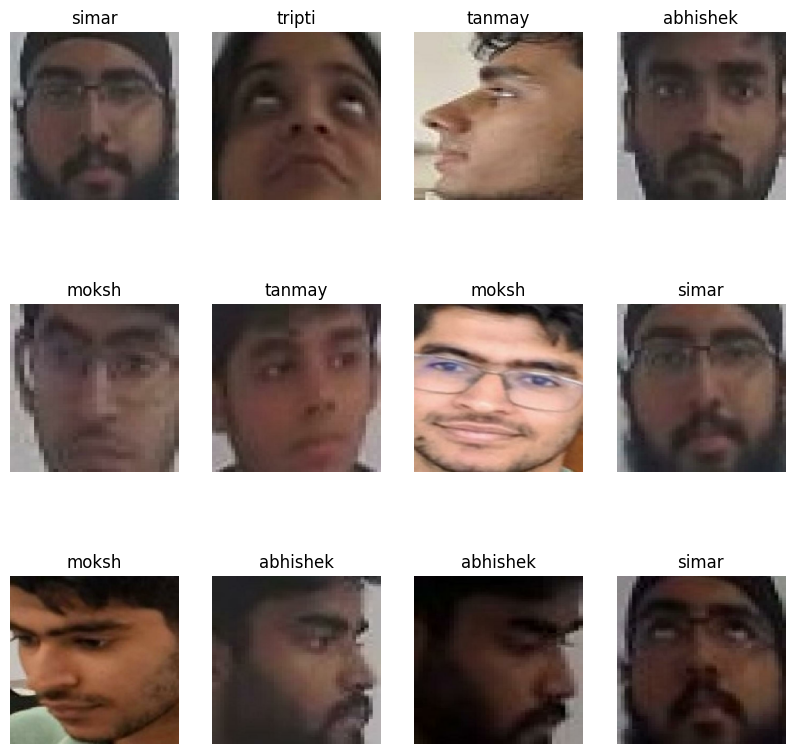

In [4]:
class_names=dataset.class_names
print(class_names)
plt.figure(figsize=(10,10))
for image_batch,labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")
        


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

x = []
y = []
for images, labels in dataset:
    x.append(np.array(images))
    y.append(np.array(labels))
x = np.concatenate(x, axis=0)
y = np.concatenate(y, axis=0)
#x_train, x_val, y_train, y_val = train_test_split(x,y, test_size = 0.2, stratify=y)

In [6]:
y.shape

(644,)

In [7]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE)
])

In [8]:
x_train = resize_and_rescale(x)
x_train = x_train.numpy()
mean = np.mean(x_train, axis=(0, 1, 2))
std = np.std(x_train, axis=(0, 1, 2))
x_train = (x_train - mean) / std

In [11]:
y_train= to_categorical(y, num_classes=n_classes)
y_val= to_categorical(y_val, num_classes=n_classes)

In [12]:
y_train.shape

(644, 6)

In [13]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS))
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS))

In [55]:
x = Flatten()(vgg_base.output)
prediction = Dense(6,activation='softmax')(x)
model_vgg = Model(inputs=vgg_base.input,outputs=prediction)

In [56]:
# Compile the model
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('vgg_face_4.h5', monitor='val_loss', verbose=1,
    save_best_only=True, mode='auto', period=1)


history_vgg=model_vgg.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=EPOCHS,
    validation_split=0.2,
    callbacks=[checkpoint]
)

Epoch 1/30
11/11 [==============================] - ETA: 0s - loss: 4.9195 - accuracy: 0.1823 
Epoch 1: val_loss improved from inf to 1.66211, saving model to vgg_face_4.h5
11/11 [==============================] - 342s 31s/step - loss: 4.9195 - accuracy: 0.1823 - val_loss: 1.6621 - val_accuracy: 0.1534
Epoch 2/30
11/11 [==============================] - ETA: 0s - loss: 1.6848 - accuracy: 0.2322 
Epoch 2: val_loss did not improve from 1.66211
11/11 [==============================] - 328s 30s/step - loss: 1.6848 - accuracy: 0.2322 - val_loss: 1.6722 - val_accuracy: 0.1875
Epoch 3/30
11/11 [==============================] - ETA: 0s - loss: 1.6311 - accuracy: 0.2593 
Epoch 3: val_loss improved from 1.66211 to 1.58066, saving model to vgg_face_4.h5
11/11 [==============================] - 297s 27s/step - loss: 1.6311 - accuracy: 0.2593 - val_loss: 1.5807 - val_accuracy: 0.2557
Epoch 4/30
11/11 [==============================] - ETA: 0s - loss: 1.5922 - accuracy: 0.2493 
Epoch 4: val_loss di

Epoch 29/30
11/11 [==============================] - ETA: 0s - loss: 1.3268e-04 - accuracy: 1.0000 
Epoch 29: val_loss did not improve from 0.00330
11/11 [==============================] - 292s 26s/step - loss: 1.3268e-04 - accuracy: 1.0000 - val_loss: 0.0081 - val_accuracy: 0.9943
Epoch 30/30
11/11 [==============================] - ETA: 0s - loss: 3.1532e-04 - accuracy: 1.0000 
Epoch 30: val_loss did not improve from 0.00330
11/11 [==============================] - 307s 28s/step - loss: 3.1532e-04 - accuracy: 1.0000 - val_loss: 0.0094 - val_accuracy: 0.9943


In [58]:
model_vgg.save('vgg_face_5.h5')

In [18]:
x = Flatten()(convolutional_base.output)
prediction = Dense(6,activation='softmax')(x)
model_resnet = Model(inputs=convolutional_base.input,outputs=prediction)

In [19]:
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('resnet_face_1.h5', monitor='val_loss', verbose=1,
    save_best_only=True, mode='auto', period=1)

history_model_resnet = model_resnet.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=EPOCHS,
    validation_split=0.2,
    callbacks=[checkpoint]
)

Epoch 1/30
9/9 [==============================] - ETA: 0s - loss: 5.4077 - accuracy: 0.6097 
Epoch 1: val_loss improved from inf to 173004.65625, saving model to resnet_face_1.h5
9/9 [==============================] - 200s 20s/step - loss: 5.4077 - accuracy: 0.6097 - val_loss: 173004.6562 - val_accuracy: 0.1473
Epoch 2/30
9/9 [==============================] - ETA: 0s - loss: 1.2504 - accuracy: 0.8796 
Epoch 2: val_loss did not improve from 173004.65625
9/9 [==============================] - 192s 22s/step - loss: 1.2504 - accuracy: 0.8796 - val_loss: 29353618.0000 - val_accuracy: 0.1860
Epoch 3/30
9/9 [==============================] - ETA: 0s - loss: 1.9060 - accuracy: 0.8466 
Epoch 3: val_loss did not improve from 173004.65625
9/9 [==============================] - 160s 16s/step - loss: 1.9060 - accuracy: 0.8466 - val_loss: 1254525184.0000 - val_accuracy: 0.0930
Epoch 4/30
9/9 [==============================] - ETA: 0s - loss: 1.8676 - accuracy: 0.8951 
Epoch 4: val_loss did not impr

Epoch 30/30
9/9 [==============================] - ETA: 0s - loss: 1.3176 - accuracy: 0.9146 
Epoch 30: val_loss did not improve from 22.86180
9/9 [==============================] - 116s 13s/step - loss: 1.3176 - accuracy: 0.9146 - val_loss: 322.4951 - val_accuracy: 0.1473


In [152]:
from tensorflow.keras.models import load_model
model_vgg=load_model('vgg_face_3.h5')

In [153]:
def image_preprocess(test):
    resize_and_rescale = tf.keras.Sequential([
        layers.experimental.preprocessing.Resizing(224,224)
    ])
    testing = resize_and_rescale(test)
    testing = testing.numpy()
    mean = np.mean(testing, axis=(0, 1, 2))
    std = np.std(testing, axis=(0, 1, 2))
    testing = (testing - mean) / std
    return testing

In [173]:
def predict_all(model,testing_dat):
    y_pred=[]
    for images,label in testing_dat:
        print(type(images))
        #plt.imshow(images)
        #test=[]
        for i in images:
            test=[]
            test.append(np.array(i))
            test = np.concatenate(test, axis=0)
            testing=image_preprocess(test)
            #print(testing.shape)
            testing = np.expand_dims(testing, 0)
            for i in testing:
                plt.imshow(i)
                plt.show()
            #print(testing.shape)
            #print(np.argmax(model.predict(testing)))
            y_pred.append(np.argmax(model.predict(testing)))
    return y_pred

In [186]:
testing_dat = tf.keras.preprocessing.image_dataset_from_directory(
    "D:/ELC 2023/moksh_test_pics",
    shuffle=True, 
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=64
)

Found 6 files belonging to 1 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'tensorflow.python.framework.ops.EagerTensor'>


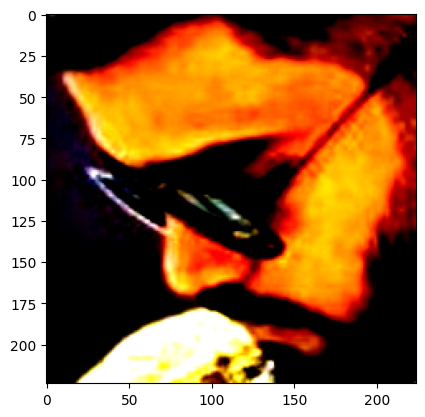

1/1 [==============================] - 0s 87ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


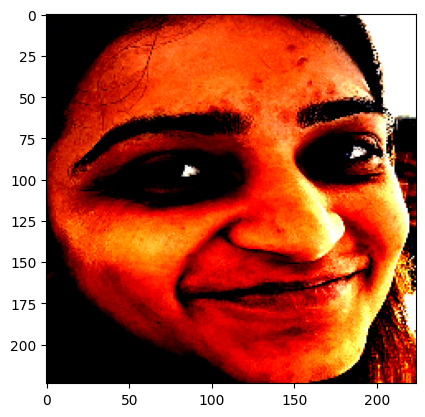

1/1 [==============================] - 0s 89ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


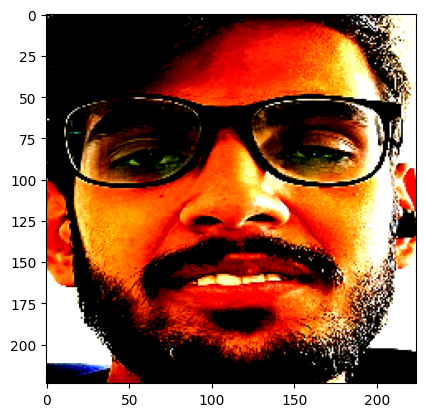

1/1 [==============================] - 0s 90ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


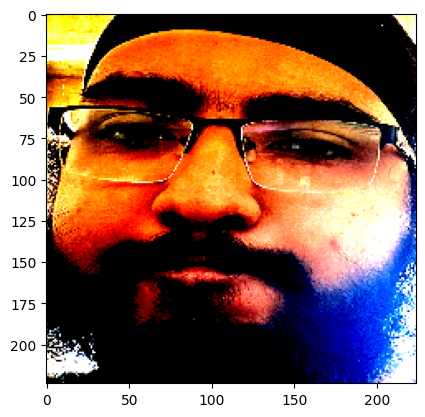

1/1 [==============================] - 0s 92ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


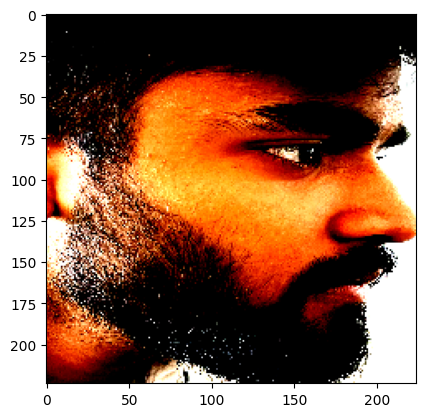

1/1 [==============================] - 0s 90ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


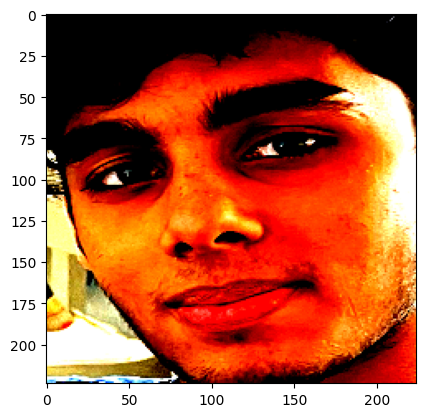

1/1 [==============================] - 0s 91ms/step


In [187]:
final=[class_names[i] for i in predict_all(model_vgg,testing_dat)]

In [188]:
final

['abhishek', 'tripti', 'harshvir', 'simar', 'moksh', 'tanmay']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


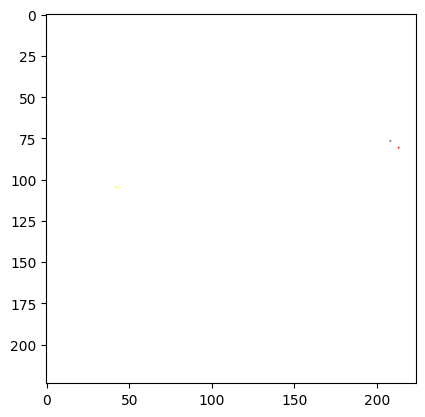

In [172]:
#image=cv2.imread('D:/ELC 2023/moksh_test_pics/test/905f835d-2165-11ee-8ced-a0e70bfba8a5.jpg')
test=[]
for images,label in testing_dat:
    #plt.imshow(images)
    for i in images:
        plt.imshow(i)
        plt.show()
    test.append(np.array(images))
test = np.concatenate(test, axis=0)

In [170]:
testing = resize_and_rescale(test)
testing = testing.numpy()
mean = np.mean(testing, axis=(0, 1, 2))
std = np.std(testing, axis=(0, 1, 2))
testing = (testing - mean) / std

In [49]:
y_pred=model_vgg.predict(testing)

1/1 [==============================] - 0s 91ms/step


In [50]:
np.argmax(y_pred)

5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


different


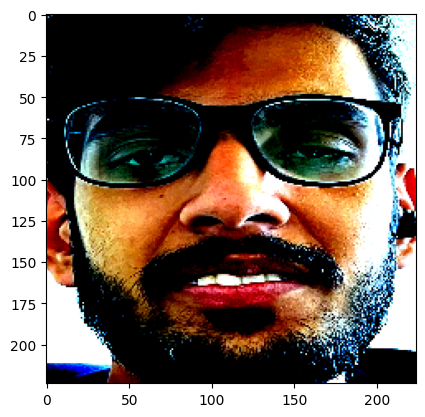

In [171]:
for i in testing:
    print("different")
    plt.imshow(i)

In [211]:
type(testing)

numpy.ndarray

In [212]:
testing

array([[[[ 1.1186261e+00,  1.0758277e+00,  9.2263713e-02],
         [ 1.0710375e+00,  1.0140278e+00,  2.2782464e-02],
         [ 1.0415996e+00,  9.7579890e-01, -2.0197829e-02],
         ...,
         [ 2.1078603e+00,  2.1799991e+00,  1.1532826e+00],
         [ 2.1515779e+00,  2.2109897e+00,  1.0786446e+00],
         [ 2.2305269e+00,  2.3135152e+00,  1.1939131e+00]],

        [[ 1.0949683e+00,  1.0451050e+00,  5.7722460e-02],
         [ 1.0653862e+00,  1.0066888e+00,  1.4531627e-02],
         [ 1.1239337e+00,  1.0827203e+00,  1.0001319e-01],
         ...,
         [ 2.2281725e+00,  2.3362403e+00,  1.3354114e+00],
         [ 2.1904042e+00,  2.2871933e+00,  1.2222939e+00],
         [ 2.2060587e+00,  2.3075228e+00,  1.2451502e+00]],

        [[ 1.1346993e+00,  1.0967010e+00,  5.9309907e-02],
         [ 1.1733195e+00,  1.1468543e+00,  1.1569681e-01],
         [ 1.1940587e+00,  1.1737869e+00,  1.4597686e-01],
         ...,
         [ 2.2394531e+00,  2.3522711e+00,  1.3534346e+00],
         [